adapted from https://www.kaggle.com/nageshsingh/generate-realistic-human-face-using-gan

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt

import tensorflow as tf

import os

from tqdm import tqdm
from PIL import Image as Img
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [6]:
PIC_DIR = f'../bundestagportraits_centercrop/'

IMAGES_COUNT = 1684
WIDTH = 222
HEIGHT=222

images = []
for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
    pic = Img.open(PIC_DIR + pic_file).convert("RGB")
    pic.thumbnail((WIDTH, HEIGHT), Img.ANTIALIAS)
    images.append(np.uint8(pic))

100%|██████████| 1684/1684 [00:02<00:00, 742.82it/s]


In [7]:
images = np.array(images) / 255
print(images.shape)

(1684, 222, 222, 3)


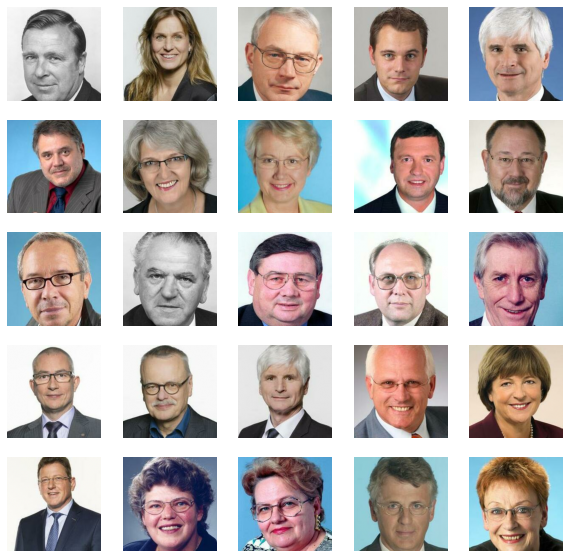

In [11]:
#Display random 25 images
plt.figure(1, figsize=(10, 10))
for i in range(25):
    ir = np.random.randint(IMAGES_COUNT)
    plt.subplot(5, 5, i+1)
    plt.imshow(images[ir])
    plt.axis('off')
plt.show()